In [254]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy

Создадим распределение:

In [255]:
class X_gen(sps.rv_continuous):
    def _pdf(self, x):
        return np.exp(-x)

X = X_gen(a = 0)

In [256]:
data = X.rvs(size=25)

In [257]:
print(f"мода: {sps.mode(data)}")
print(f"медиана: {np.median(data)}")
print(f"размах: {np.max(data) - np.min(data)}")
print(f"коэффициент асимметрии: {sps.skew(data)}")

мода: ModeResult(mode=np.float64(0.02021857203933642), count=np.int64(1))
медиана: 0.7719251151810583
размах: 3.502970169999683
коэффициент асимметрии: 1.222931210426661


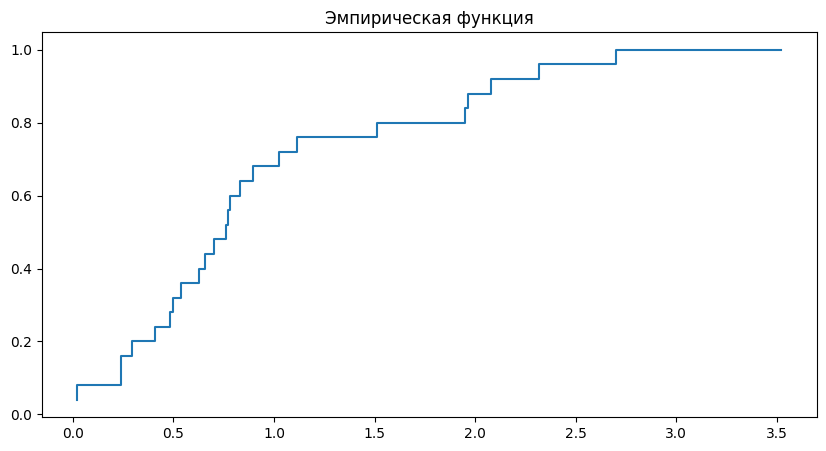

In [258]:
#Эмперическая функция
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Эмпирическая функция")
ax.step(arr, np.arange(1, len(arr) + 1) / len(arr))

(array([0.54810629, 0.68513287, 0.06851329, 0.27405315, 0.06851329,
        0.06851329]),
 array([0.02021857, 0.60404693, 1.1878753 , 1.77170366, 2.35553202,
        2.93936038, 3.52318874]),
 <BarContainer object of 6 artists>)

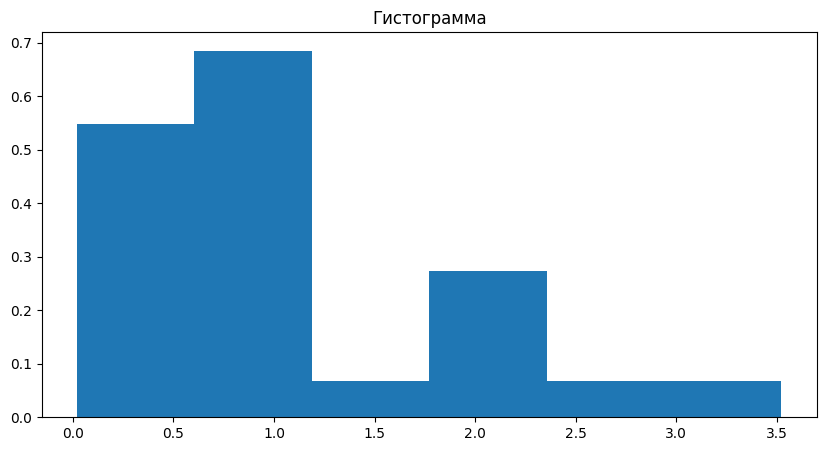

In [259]:
#Гистограмма
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c18fec8c2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c18fec8c830>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c18fec8c0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c18fec8cd70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c18fec8cf80>],
 'means': []}

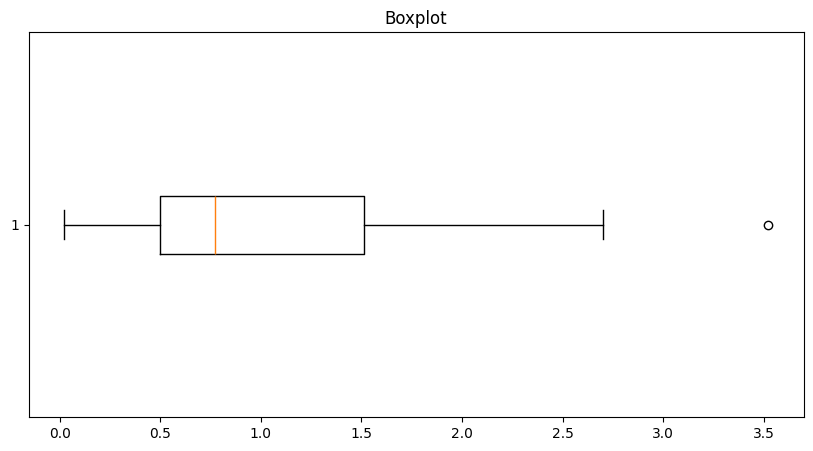

In [260]:
#Boxplot
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Boxplot")
ax.boxplot(arr, vert=False)

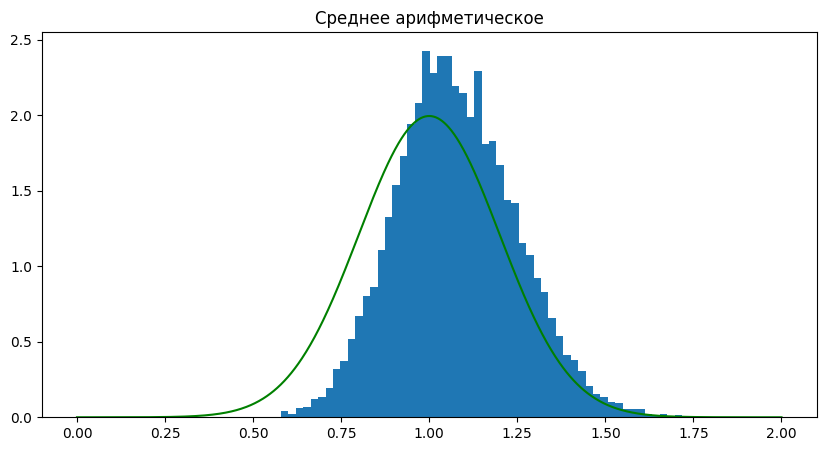

In [261]:
#сравнение оценок плотности распределения среднего арифметического, полученных с помощью ЦПТ и bootstrap
bootstrap_means = sps.bootstrap((data, ), statistic=np.mean)

arr = np.sort(bootstrap_means.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Среднее арифметическое")
ax.hist(arr, bins='auto', density=True)

sigma = 1 #дисперсия исходной сл. величины

mat_waiting = 1 #математическое ожидание исходной сл. величины

x = np.linspace(mat_waiting - sigma, mat_waiting + sigma, 1000)

#по ЦПТ и наследовании сх-ти получаем, что среднее арифметическое имеет нормальное рапределение с параметрами (1, 1/25)
ax.plot(x, sps.norm.pdf(x, 1, 0.2), color='green')



(array([0.00194822, 0.00194822, 0.00194822, 0.00779289, 0.01168934,
        0.00584467, 0.03117158, 0.0409127 , 0.05844671, 0.08961829,
        0.11884164, 0.1071523 , 0.20066704, 0.29612999, 0.31756045,
        0.43835032, 0.48705591, 0.58251887, 0.69551584, 0.69356762,
        0.88644176, 0.85332196, 0.94488847, 0.97995649, 1.02476564,
        0.98969761, 0.90007932, 0.8650113 , 0.88644176, 0.80461637,
        0.79487525, 0.71499808, 0.59615644, 0.5026417 , 0.47147012,
        0.42471275, 0.39354118, 0.38574828, 0.30587111, 0.22599394,
        0.22989039, 0.18508125, 0.13053098, 0.12078987, 0.10325585,
        0.09156651, 0.07208427, 0.08572184, 0.06818783, 0.03701625,
        0.03506803, 0.03506803, 0.02143046, 0.02532691, 0.00974112,
        0.01168934, 0.01363757, 0.01168934, 0.01558579, 0.00584467,
        0.00584467, 0.00584467, 0.00194822, 0.00194822, 0.00584467,
        0.        , 0.        , 0.00194822, 0.00194822, 0.        ,
        0.        , 0.        , 0.        , 0.00

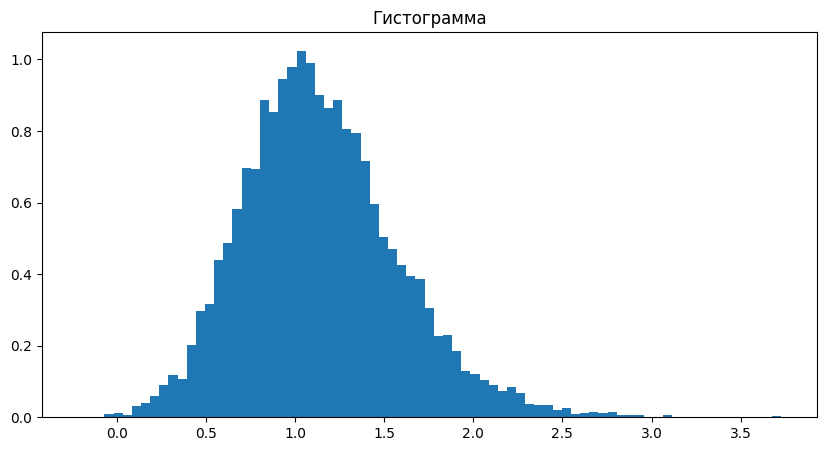

In [262]:
#бутстраповская оценка коэффициента асимметрии

bootstrap_skew = sps.bootstrap((data, ), statistic=sps.skew)

arr = np.sort(bootstrap_skew.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)


In [263]:
#вероятность того, что коэффициент асимметрии меньше единицы

count = 0

for i in bootstrap_skew.bootstrap_distribution:
    count += int(i < 1)

print(count / len(bootstrap_skew.bootstrap_distribution))

0.3945394539453945


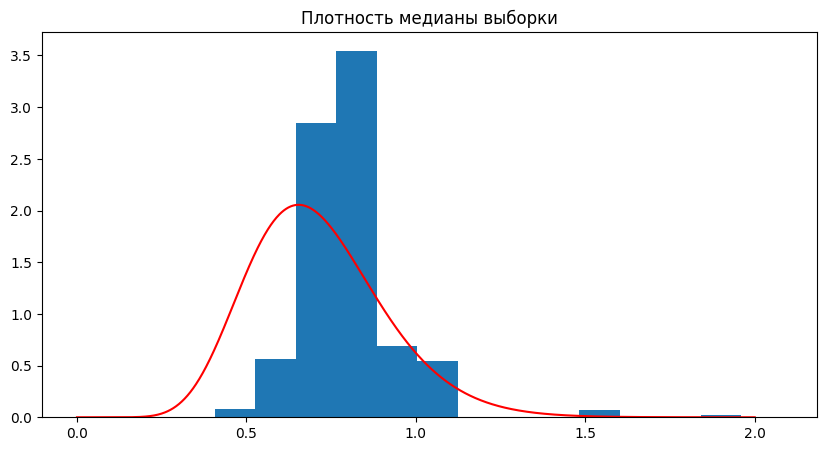

In [264]:
#сравнение плотности медианы выборки с бутстраповской оценкой

def p_median(x):
    return 25 * np.exp(-x) * scipy.special.comb(24, 12) * (np.exp(-x)) ** 12 * (1 - np.exp(-x)) ** 12

p_median = np.vectorize(p_median)

bootstrap_median = sps.bootstrap((data, ), statistic=np.median)

arr = np.sort(bootstrap_median.bootstrap_distribution)

x = np.arange(0, 2, (max(arr) - min(arr)) / 1000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Плотность медианы выборки")
ax.hist(arr, bins=int(1 + np.log2(len(arr))), density=True)

ax.plot(x, p_median(x), color='red')